In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Successive Halving

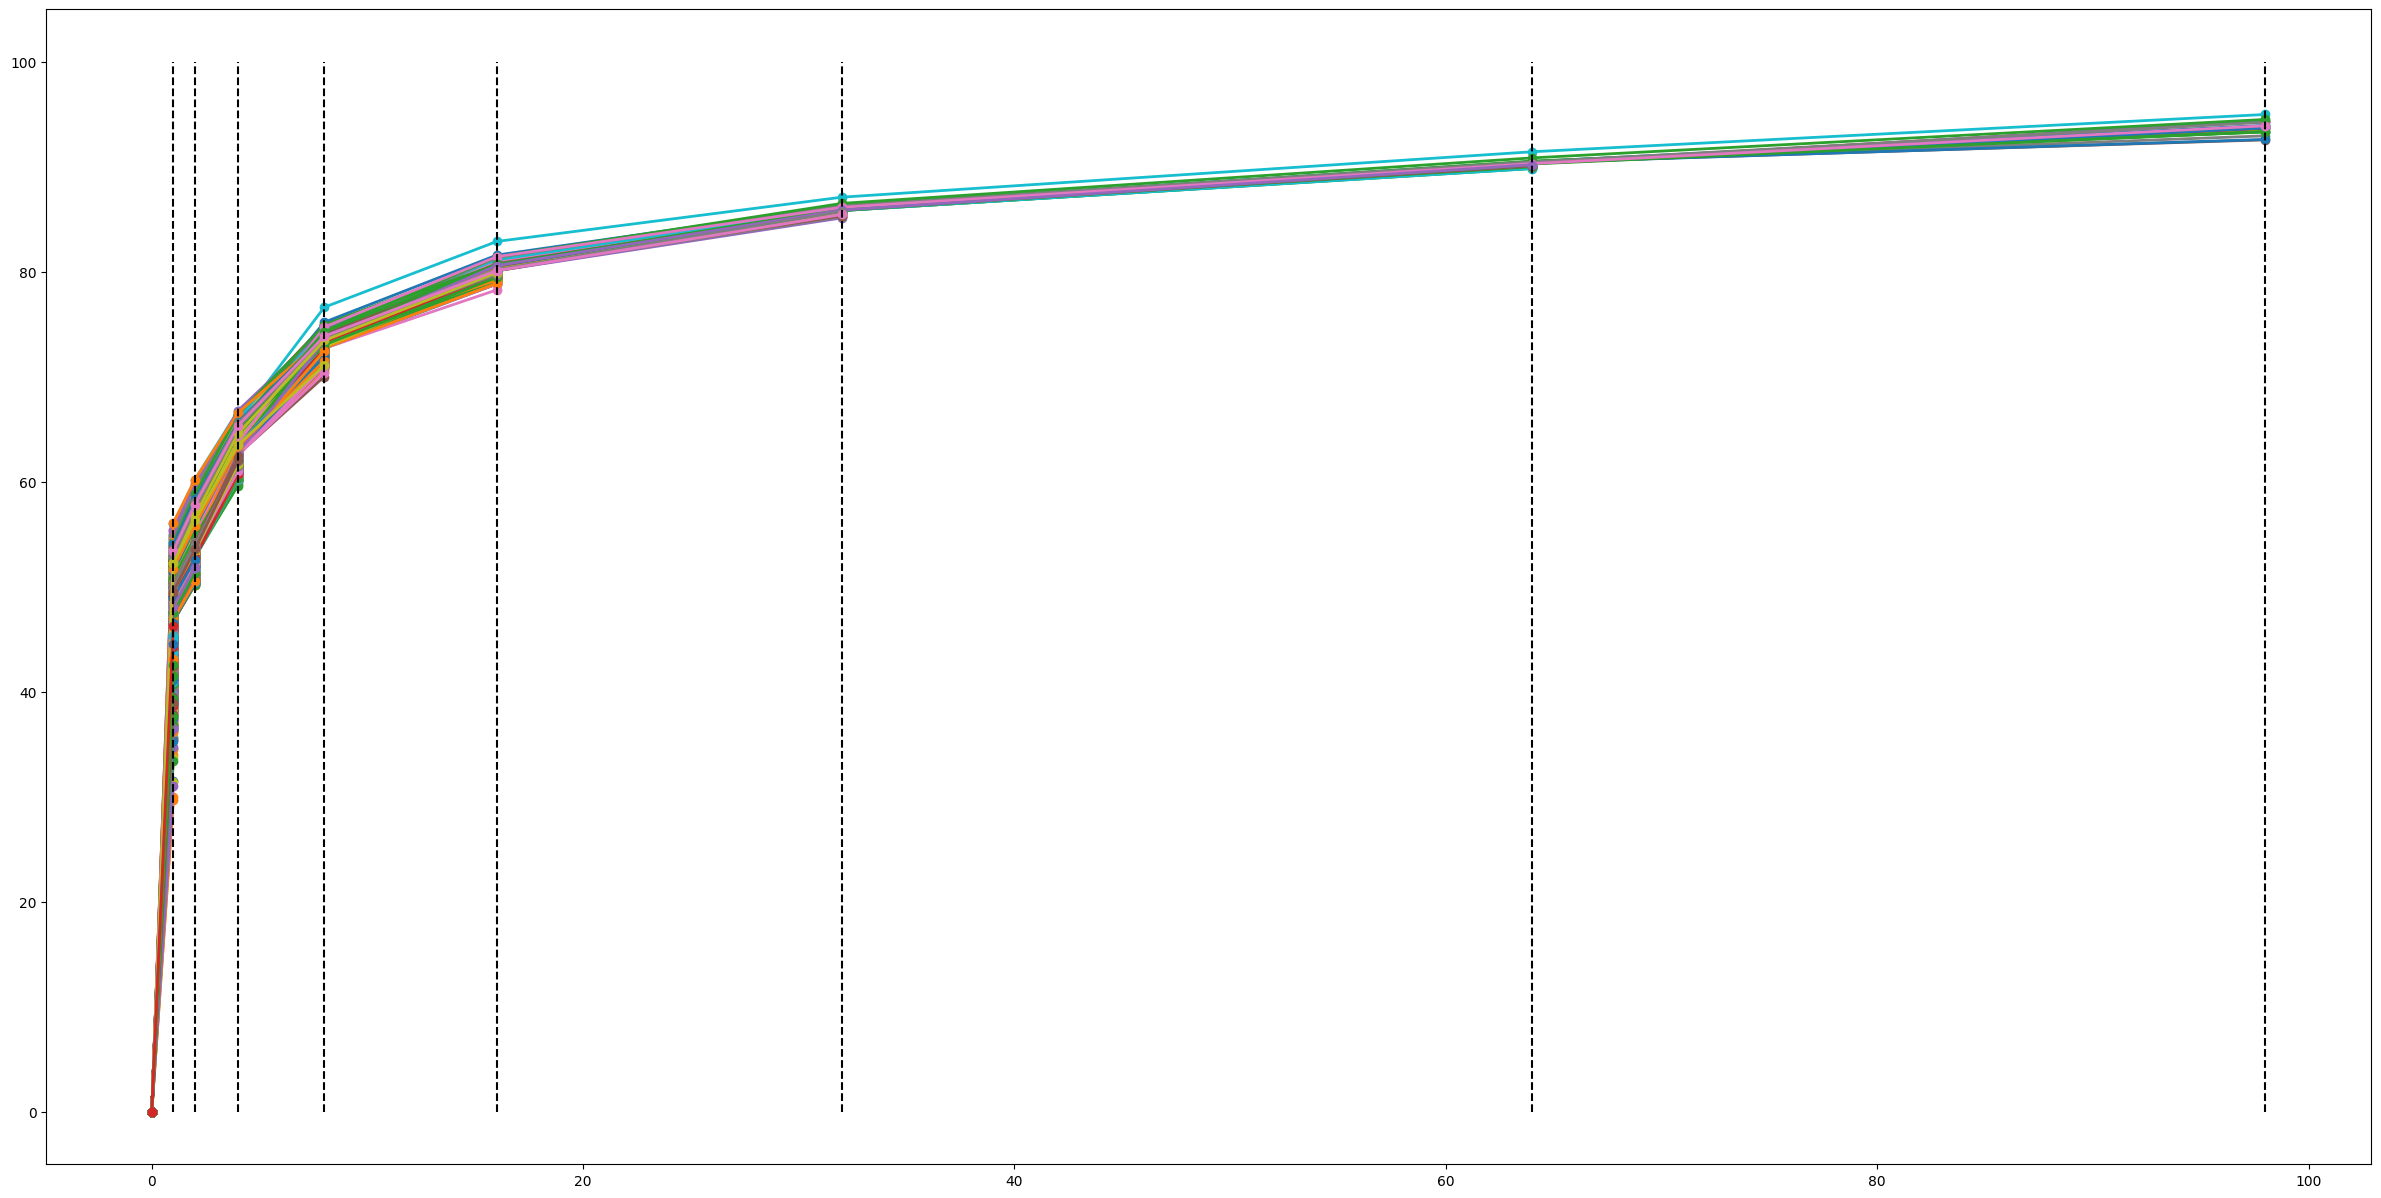

In [27]:
# Plot: Scenario 1
plt.figure(figsize=(30, 15))

for entries in results_dict.values():
    e = [0] + epochs[:len(entries)]
    a = [0] + entries
    plt.plot(e, a, marker='o', linewidth=2)

for e in epochs:
    plt.plot([e, e], [0, 100], linestyle='dashed', color='black')

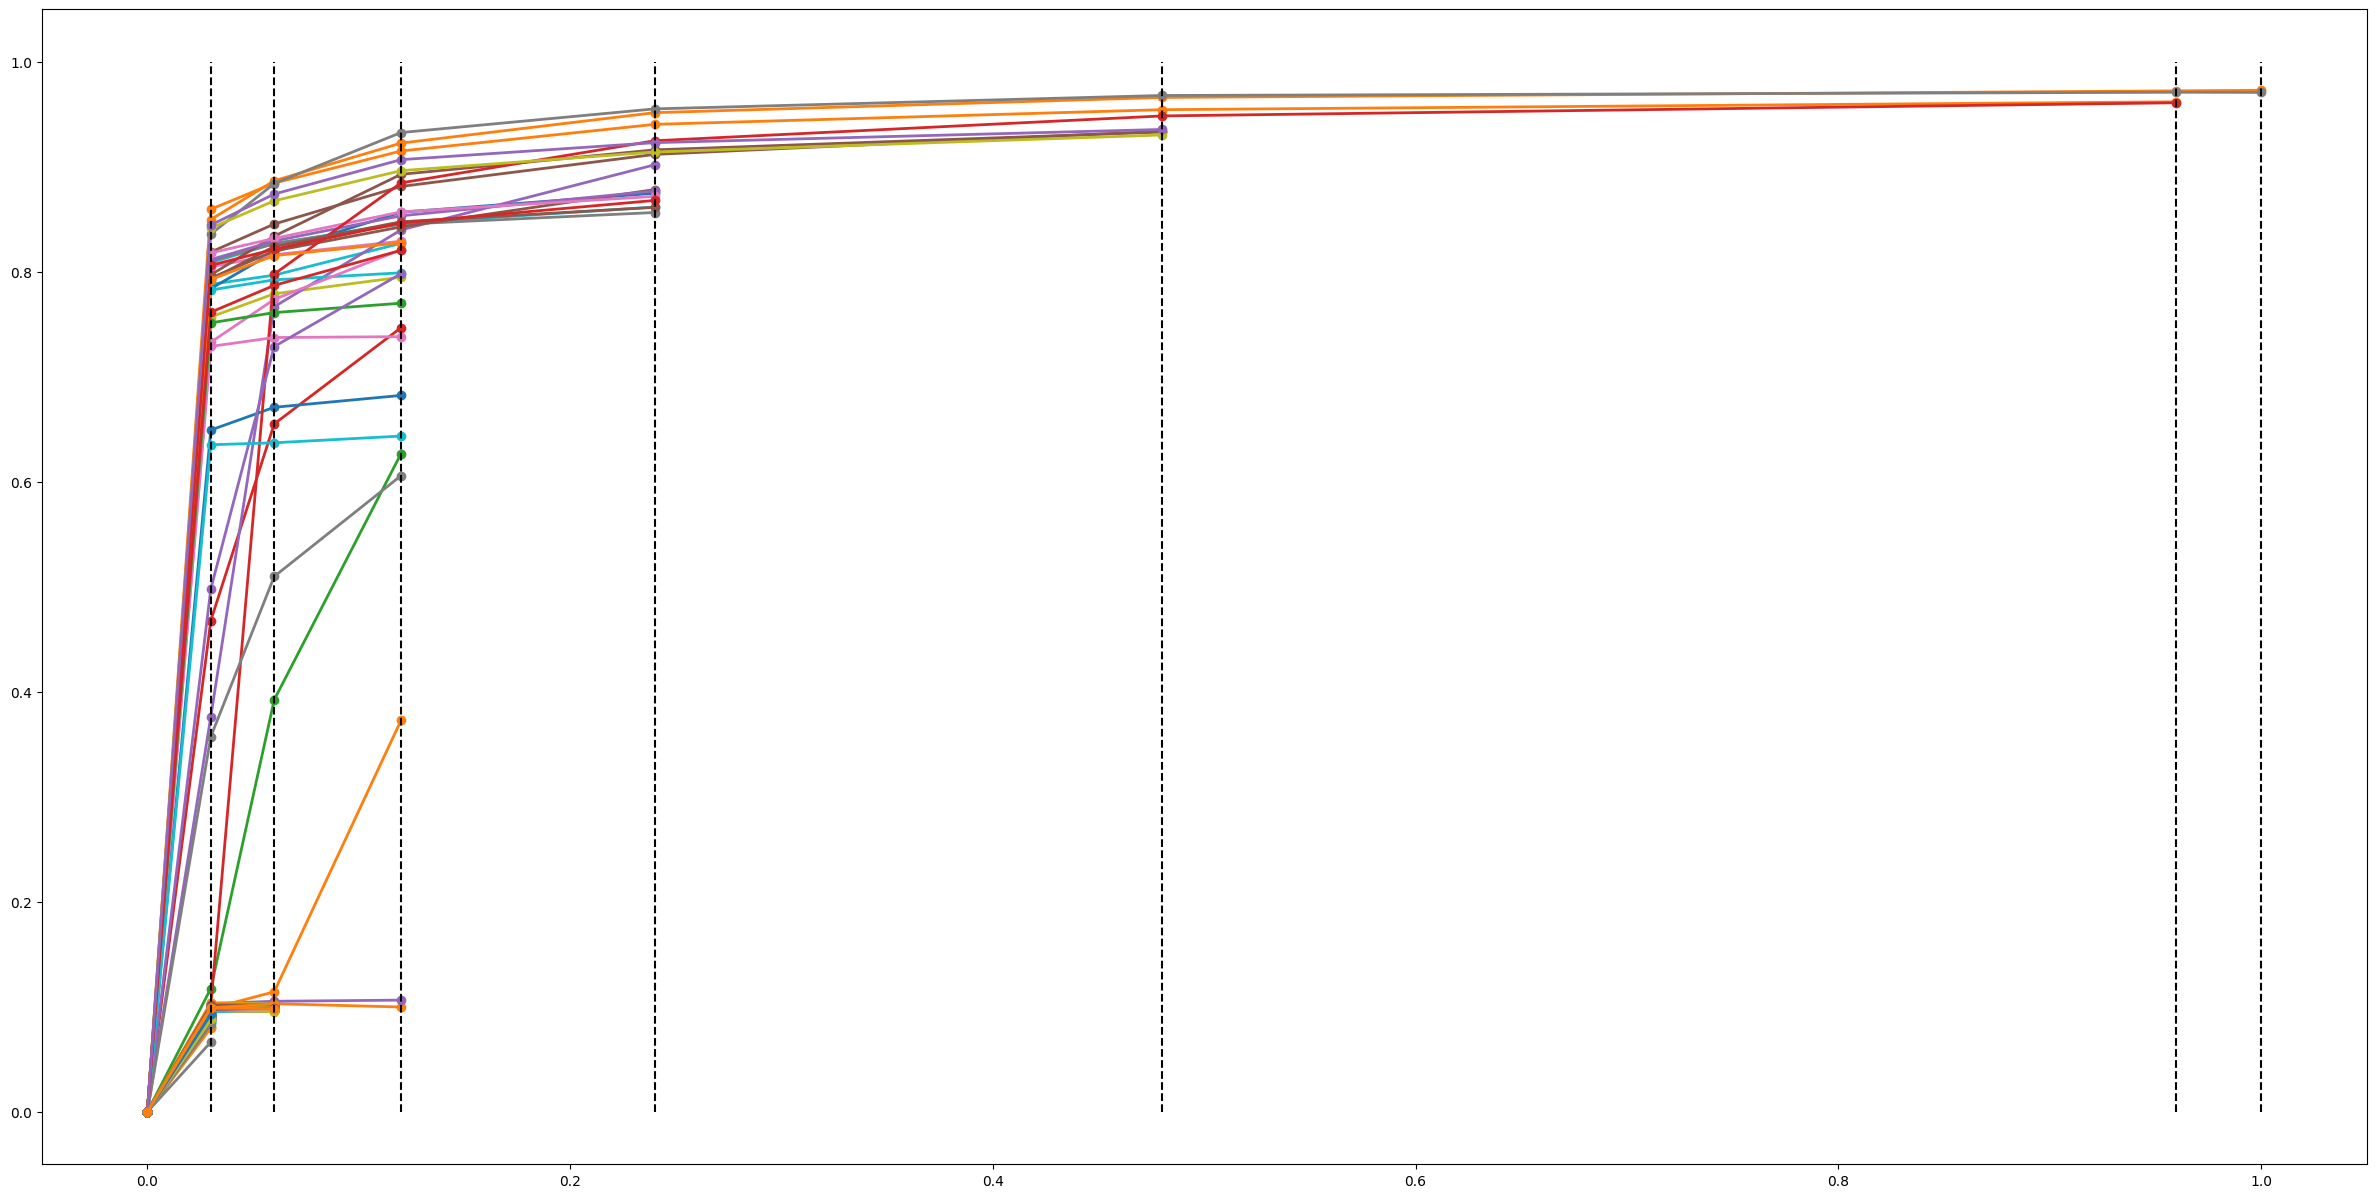

In [30]:
# Plot: Scenario 2
plt.figure(figsize=(30, 15))

for entries in results_dict.values():
    ts = [0] + trainsize[:len(entries)]
    a = [0] + entries
    plt.plot(ts, a, marker='o', linewidth=2)

for ts in trainsize:
    plt.plot([ts, ts], [0, 1], linestyle='dashed', color='black')

In [4]:
sh1_df = pd.read_csv("./results/csv/trials-SuccessiveHalving-nb301_cifar10.csv")
sh1_df.columns

Index(['Unnamed: 0',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_1',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_reduce_5',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_0',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_normal_4',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_normal_5',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_6',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_reduce_3',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_reduce_4',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_8',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_13',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_12',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_13',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_7',
       'NetworkSelectorDatasetInfo_COLON_dar

In [5]:
sh2_df = pd.read_csv("./results/csv/trials-SuccessiveHalving-rbv2_xgboost_16.csv")
sh2_df.columns

Index(['Unnamed: 0', 'subsample', 'booster', 'gamma', 'nrounds',
       'colsample_bylevel', 'eta', 'lambda', 'num.impute.selected.cpo',
       'colsample_bytree', 'alpha', 'max_depth', 'min_child_weight',
       'trainsize', 'repl', 'start_time', 'end_time',
       'metric:acc [0.0; 1.0] (maximize)', 'config_id', 'skip_drop',
       'rate_drop', 'seed', 'status'],
      dtype='object')

In [567]:
sh1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max()

seed
0       94.24923
42      94.39812
1234    94.65147
2025    94.18992
4321    94.36792
Name: metric:val_accuracy [0.0; 100.0] (maximize), dtype: float64

In [11]:
print(sh1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max().max())
print(sh1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max().mean())
print(sh1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max().median())

94.65147
94.37133200000001
94.36792


In [8]:
sh2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max()

seed
0       0.978073
42      0.977666
1234    0.978833
2025    0.981128
4321    0.977133
Name: metric:acc [0.0; 1.0] (maximize), dtype: float64

In [12]:
print(sh2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max().max())
print(sh2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max().mean())
print(sh2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max().median())

0.98112786
0.978566578
0.97807294


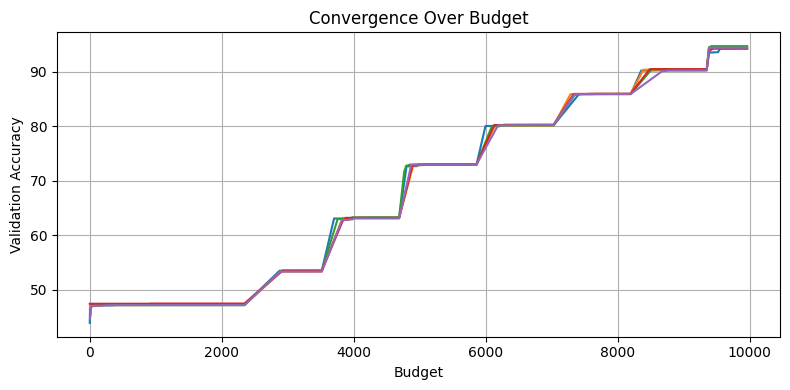

In [13]:
plt.figure(figsize=(8, 4))
for seed in [0, 42, 1234, 2025, 4321]:
    budget = sh1_df[sh1_df['seed']==seed]['end_time']
    acc_values = sh1_df[sh1_df['seed']==seed]['metric:val_accuracy [0.0; 100.0] (maximize)']
    best_so_far = np.maximum.accumulate(acc_values)
    plt.plot(budget, best_so_far)

plt.xlabel('Budget')
plt.ylabel('Validation Accuracy')
plt.title('Convergence Over Budget')
# plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

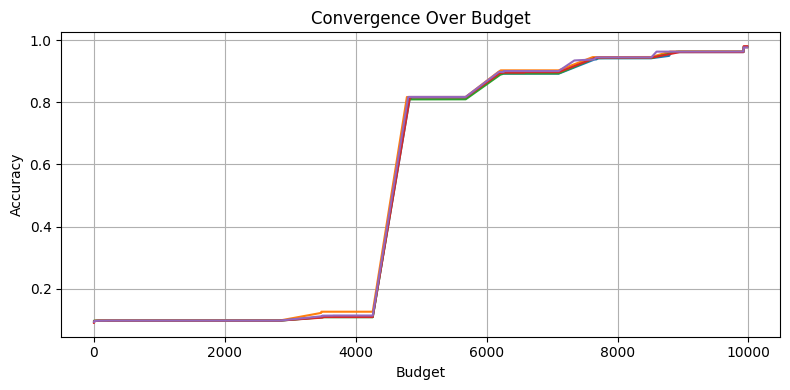

In [14]:
plt.figure(figsize=(8, 4))
for seed in [0, 42, 1234, 2025, 4321]:
    budget = sh2_df[sh2_df['seed']==seed]['end_time']
    acc_values = sh2_df[sh2_df['seed']==seed]['metric:acc [0.0; 1.0] (maximize)']
    best_so_far = np.maximum.accumulate(acc_values)
    plt.plot(budget, best_so_far)

plt.xlabel('Budget')
plt.ylabel('Accuracy')
plt.title('Convergence Over Budget')
# plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

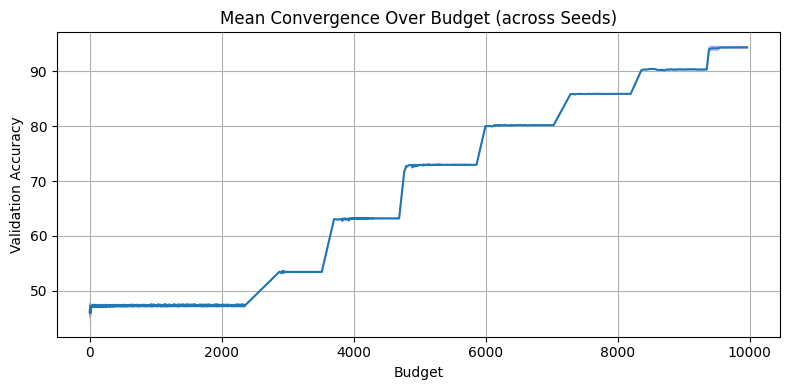

In [32]:
plt.figure(figsize=(8, 4))
sh1_df['best_so_far'] = sh1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].cummax()
sh1_mean_std_curve = sh1_df.groupby('end_time')['best_so_far'].agg(['mean', 'std']).reset_index()

plt.plot(sh1_mean_std_curve['end_time'], sh1_mean_std_curve['mean'], label='Mean Accuracy')
plt.fill_between(sh1_mean_std_curve['end_time'],
                 sh1_mean_std_curve['mean'] - sh1_mean_std_curve['std'],
                 sh1_mean_std_curve['mean'] + sh1_mean_std_curve['std'],
                 color='blue', alpha=0.2, label='±1 Std Dev')
plt.xlabel('Budget')
plt.ylabel('Validation Accuracy')
plt.title('Mean Convergence Over Budget (across Seeds)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

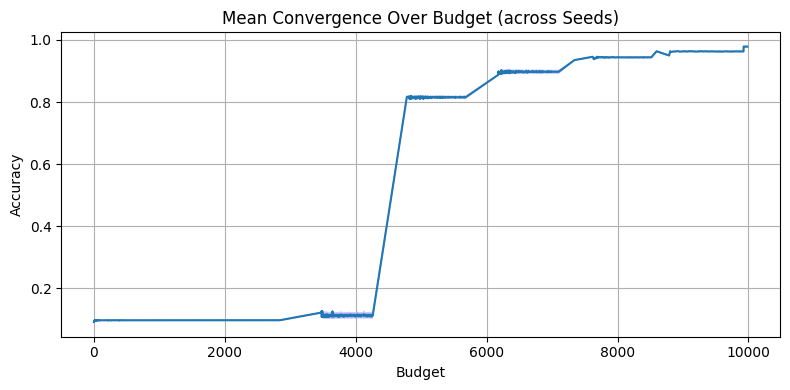

In [16]:
plt.figure(figsize=(8,4))
sh2_df['best_so_far'] = sh2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].cummax()
sh2_mean_std_curve = sh2_df.groupby('end_time')['best_so_far'].agg(['mean', 'std']).reset_index()

plt.plot(sh2_mean_std_curve['end_time'], sh2_mean_std_curve['mean'], label='Mean Accuracy')
plt.fill_between(sh2_mean_std_curve['end_time'],
                 sh2_mean_std_curve['mean'] - sh2_mean_std_curve['std'],
                 sh2_mean_std_curve['mean'] + sh2_mean_std_curve['std'],
                 color='blue', alpha=0.2, label='±1 Std Dev')
plt.xlabel('Budget')
plt.ylabel('Accuracy')
plt.title('Mean Convergence Over Budget (across Seeds)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bayesian Optimisation

In [17]:
bo1_df = pd.read_csv("./results/csv/trials-BayesianOptimisation-nb301_cifar10.csv")
bo1_df.columns

Index(['Unnamed: 0',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_1',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_reduce_5',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_0',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_normal_4',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_normal_5',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_6',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_reduce_3',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_reduce_4',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_8',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_13',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_12',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_13',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_7',
       'NetworkSelectorDatasetInfo_COLON_dar

In [18]:
bo2_df = pd.read_csv("./results/csv/trials-BayesianOptimisation-rbv2_xgboost_16.csv")
bo2_df.columns

Index(['Unnamed: 0', 'subsample', 'booster', 'gamma', 'nrounds',
       'colsample_bylevel', 'eta', 'lambda', 'num.impute.selected.cpo',
       'colsample_bytree', 'alpha', 'max_depth', 'min_child_weight',
       'trainsize', 'repl', 'start_time', 'end_time',
       'metric:acc [0.0; 1.0] (maximize)', 'skip_drop', 'rate_drop', 'seed',
       'status', 'config_id'],
      dtype='object')

In [19]:
bo1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max()

seed
0       93.381990
42      93.324715
1234    93.209860
2025    92.847300
4321    93.193665
Name: metric:val_accuracy [0.0; 100.0] (maximize), dtype: float64

In [20]:
print(bo1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max().max())
print(bo1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max().mean())
print(bo1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max().median())

93.38199
93.191506
93.20986


In [21]:
bo2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max()

seed
0       0.976457
42      0.973197
1234    0.962348
2025    0.965337
4321    0.961190
Name: metric:acc [0.0; 1.0] (maximize), dtype: float64

In [22]:
print(bo2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max().max())
print(bo2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max().mean())
print(bo2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max().median())

0.9764569
0.9677057119999999
0.9653367


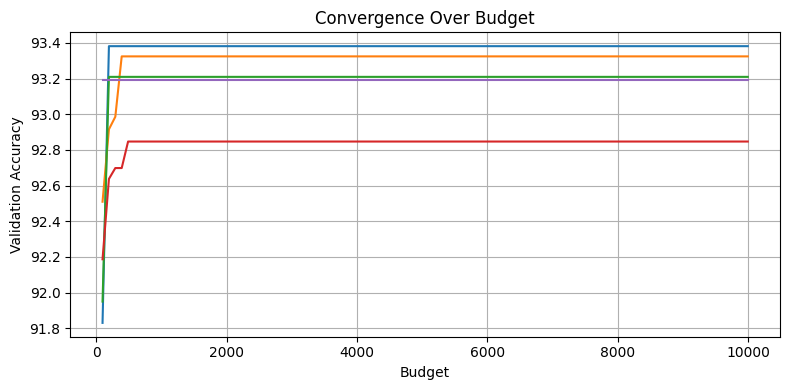

In [24]:
plt.figure(figsize=(8, 4))
for seed in [0, 42, 1234, 2025, 4321]:
    budget = bo1_df[bo1_df['seed']==seed]['end_time']
    acc_values = bo1_df[bo1_df['seed']==seed]['metric:val_accuracy [0.0; 100.0] (maximize)']
    best_so_far = np.maximum.accumulate(acc_values)
    plt.plot(budget, best_so_far)

plt.xlabel('Budget')
plt.ylabel('Validation Accuracy')
plt.title('Convergence Over Budget')
# plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

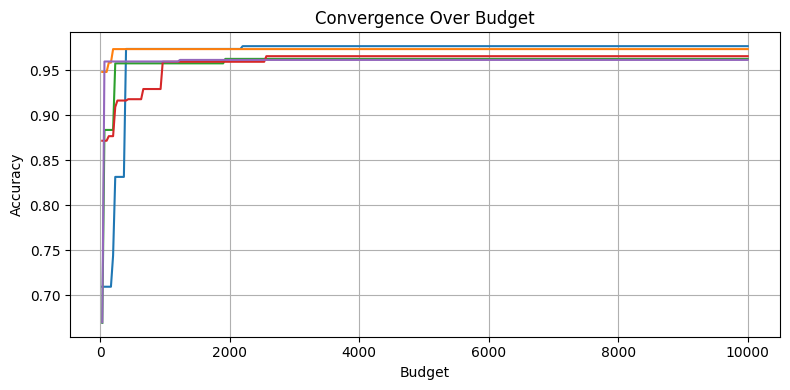

In [29]:
plt.figure(figsize=(8, 4))
for seed in [0, 42, 1234, 2025, 4321]:
    budget = bo2_df[bo2_df['seed']==seed]['end_time']
    acc_values = bo2_df[bo2_df['seed']==seed]['metric:acc [0.0; 1.0] (maximize)']
    best_so_far = np.maximum.accumulate(acc_values)
    plt.plot(budget, best_so_far)

plt.xlabel('Budget')
plt.ylabel('Accuracy')
plt.title('Convergence Over Budget')
plt.grid(True)
plt.tight_layout()
plt.show()


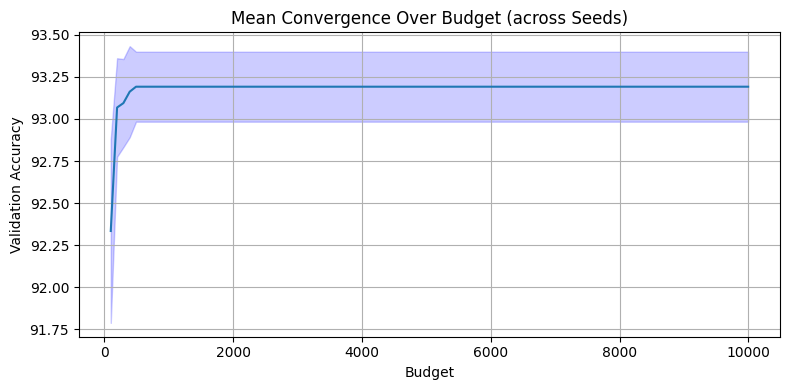

In [30]:
plt.figure(figsize=(8, 4))
bo1_df['best_so_far'] = bo1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].cummax()
bo1_mean_std_curve = bo1_df.groupby('end_time')['best_so_far'].agg(['mean', 'std']).reset_index()

plt.plot(bo1_mean_std_curve['end_time'], bo1_mean_std_curve['mean'], label='Mean Accuracy')
plt.fill_between(bo1_mean_std_curve['end_time'],
                 bo1_mean_std_curve['mean'] - bo1_mean_std_curve['std'],
                 bo1_mean_std_curve['mean'] + bo1_mean_std_curve['std'],
                 color='blue', alpha=0.2, label='±1 Std Dev')
plt.xlabel('Budget')
plt.ylabel('Validation Accuracy')
plt.title('Mean Convergence Over Budget (across Seeds)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

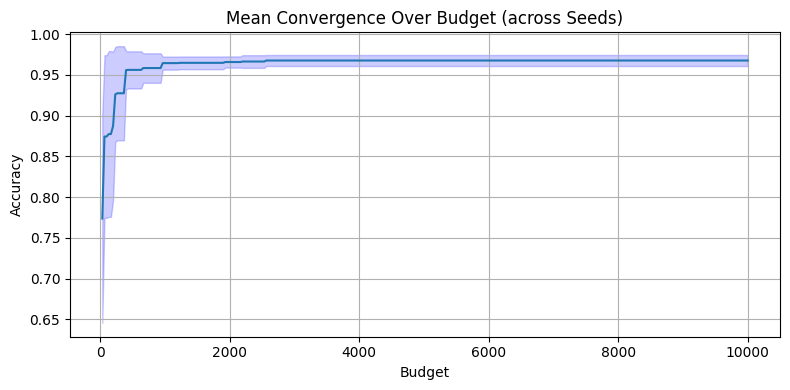

In [31]:
plt.figure(figsize=(8, 4))
bo2_df['best_so_far'] = bo2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].cummax()
bo2_mean_std_curve = bo2_df.groupby('end_time')['best_so_far'].agg(['mean', 'std']).reset_index()

plt.plot(bo2_mean_std_curve['end_time'], bo2_mean_std_curve['mean'], label='Mean Accuracy')
plt.fill_between(bo2_mean_std_curve['end_time'],
                 bo2_mean_std_curve['mean'] - bo2_mean_std_curve['std'],
                 bo2_mean_std_curve['mean'] + bo2_mean_std_curve['std'],
                 color='blue', alpha=0.2, label='±1 Std Dev')
plt.xlabel('Budget')
plt.ylabel('Accuracy')
plt.title('Mean Convergence Over Budget (across Seeds)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Search

In [33]:
rs1_df = pd.read_csv("./results/csv/trials-RandomSearch-nb301_cifar10.csv")
rs1_df.columns

Index(['Unnamed: 0',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_1',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_reduce_5',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_0',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_normal_4',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_normal_5',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_6',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_reduce_3',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_reduce_4',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_8',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_13',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_12',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_13',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_7',
       'NetworkSelectorDatasetInfo_COLON_dar

In [34]:
rs2_df = pd.read_csv("./results/csv/trials-RandomSearch-rbv2_xgboost_16.csv")
rs2_df.columns

Index(['Unnamed: 0', 'subsample', 'booster', 'gamma', 'nrounds',
       'colsample_bylevel', 'eta', 'lambda', 'num.impute.selected.cpo',
       'colsample_bytree', 'alpha', 'max_depth', 'min_child_weight',
       'trainsize', 'repl', 'start_time', 'end_time',
       'metric:acc [0.0; 1.0] (maximize)', 'skip_drop', 'rate_drop', 'seed',
       'status', 'config_id'],
      dtype='object')

In [35]:
rs1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max()

seed
0       94.222310
42      93.664350
1234    94.014410
2025    94.152275
4321    93.847300
Name: metric:val_accuracy [0.0; 100.0] (maximize), dtype: float64

In [36]:
print(rs1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max().max())
print(rs1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max().mean())
print(rs1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max().median())

94.22231
93.980129
94.01441


In [37]:
rs2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max()

seed
0       0.976457
42      0.973197
1234    0.974078
2025    0.971515
4321    0.976572
Name: metric:acc [0.0; 1.0] (maximize), dtype: float64

In [38]:
print(rs2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max().max())
print(rs2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max().mean())
print(rs2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max().median())

0.97657233
0.974363938
0.9740777


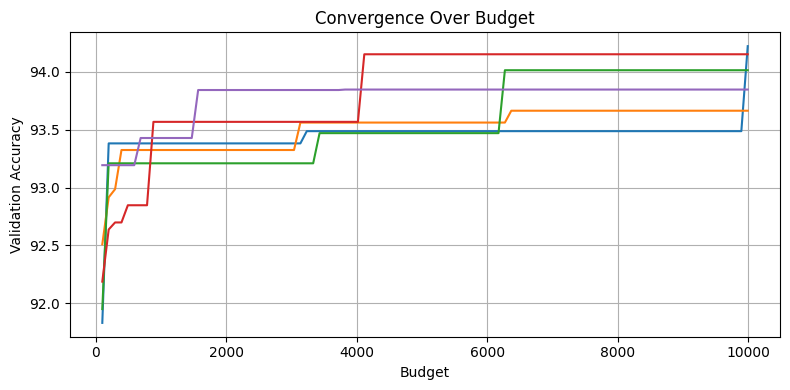

In [39]:
plt.figure(figsize=(8, 4))
for seed in [0, 42, 1234, 2025, 4321]:
    budget = rs1_df[rs1_df['seed']==seed]['end_time']
    acc_values = rs1_df[rs1_df['seed']==seed]['metric:val_accuracy [0.0; 100.0] (maximize)']
    best_so_far = np.maximum.accumulate(acc_values)
    plt.plot(budget, best_so_far)

plt.xlabel('Budget')
plt.ylabel('Validation Accuracy')
plt.title('Convergence Over Budget')
# plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

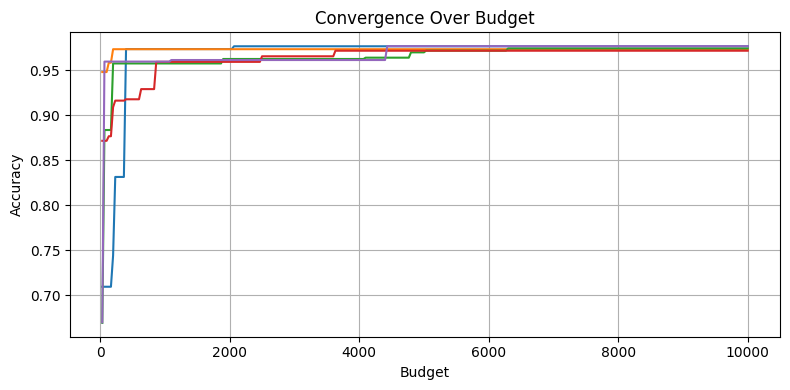

In [42]:
plt.figure(figsize=(8, 4))
for seed in [0, 42, 1234, 2025, 4321]:
    budget = rs2_df[rs2_df['seed']==seed]['end_time']
    acc_values = rs2_df[rs2_df['seed']==seed]['metric:acc [0.0; 1.0] (maximize)']
    best_so_far = np.maximum.accumulate(acc_values)
    plt.plot(budget, best_so_far)

plt.xlabel('Budget')
plt.ylabel('Accuracy')
plt.title('Convergence Over Budget')
# plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

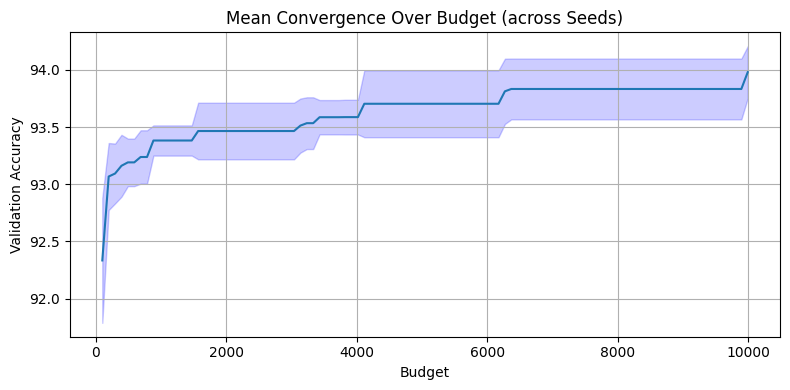

In [43]:
plt.figure(figsize=(8, 4))
rs1_df['best_so_far'] = rs1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].cummax()
rs1_mean_std_curve = rs1_df.groupby('end_time')['best_so_far'].agg(['mean', 'std']).reset_index()

plt.plot(rs1_mean_std_curve['end_time'], rs1_mean_std_curve['mean'], label='Mean Accuracy')
plt.fill_between(rs1_mean_std_curve['end_time'],
                 rs1_mean_std_curve['mean'] - rs1_mean_std_curve['std'],
                 rs1_mean_std_curve['mean'] + rs1_mean_std_curve['std'],
                 color='blue', alpha=0.2, label='±1 Std Dev')
plt.xlabel('Budget')
plt.ylabel('Validation Accuracy')
plt.title('Mean Convergence Over Budget (across Seeds)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

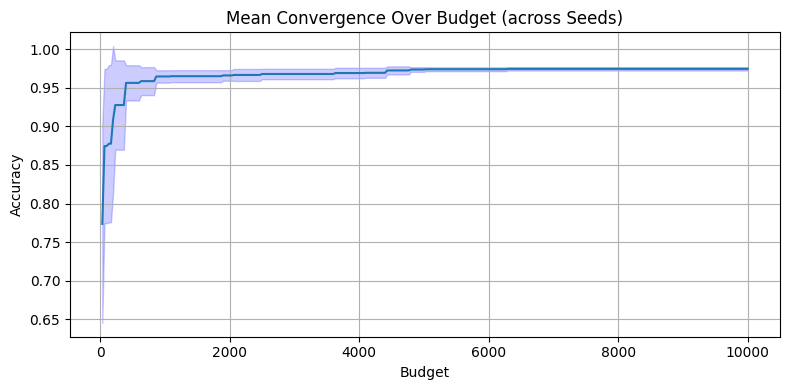

In [44]:
plt.figure(figsize=(8, 4))
rs2_df['best_so_far'] = rs2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].cummax()
rs2_mean_std_curve = rs2_df.groupby('end_time')['best_so_far'].agg(['mean', 'std']).reset_index()

plt.plot(rs2_mean_std_curve['end_time'], rs2_mean_std_curve['mean'], label='Mean Accuracy')
plt.fill_between(rs2_mean_std_curve['end_time'],
                 rs2_mean_std_curve['mean'] - rs2_mean_std_curve['std'],
                 rs2_mean_std_curve['mean'] + rs2_mean_std_curve['std'],
                 color='blue', alpha=0.2, label='±1 Std Dev')
plt.xlabel('Budget')
plt.ylabel('Accuracy')
plt.title('Mean Convergence Over Budget (across Seeds)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

# Grid Search

In [45]:
gs1_df = pd.read_csv("./results/csv/trials-GridSearch-nb301_cifar10.csv")
gs1_df.columns

Index(['Unnamed: 0',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_0',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_1',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_0',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_reduce_1',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_normal_3',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_normal_4',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_normal_5',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_reduce_3',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_reduce_4',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_inputs_node_reduce_5',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_11',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_13',
       'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_3',
       'NetworkSelectorDatasetInfo_COL

In [46]:
gs2_df = pd.read_csv("./results/csv/trials-GridSearch-rbv2_xgboost_16.csv")
gs2_df.columns

Index(['Unnamed: 0', 'alpha', 'booster', 'lambda', 'nrounds',
       'num.impute.selected.cpo', 'subsample', 'colsample_bylevel',
       'colsample_bytree', 'eta', 'gamma', 'max_depth', 'min_child_weight',
       'rate_drop', 'skip_drop', 'trainsize', 'repl', 'start_time', 'end_time',
       'metric:acc [0.0; 1.0] (maximize)', 'seed', 'status', 'config_id'],
      dtype='object')

In [47]:
gs1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max()

seed
0       93.672066
42      93.064030
1234    93.129750
2025    94.203690
4321    93.388750
Name: metric:val_accuracy [0.0; 100.0] (maximize), dtype: float64

In [48]:
print(gs1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max().max())
print(gs1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max().mean())
print(gs1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max().median())

94.20369
93.4916572
93.38875


In [49]:
gs2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max()

seed
0       0.999994
42      1.000000
1234    1.000000
2025    0.999996
4321    0.999996
Name: metric:acc [0.0; 1.0] (maximize), dtype: float64

In [50]:
print(gs2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max().max())
print(gs2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max().mean())
print(gs2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max().median())

1.0
0.99999734
0.9999962


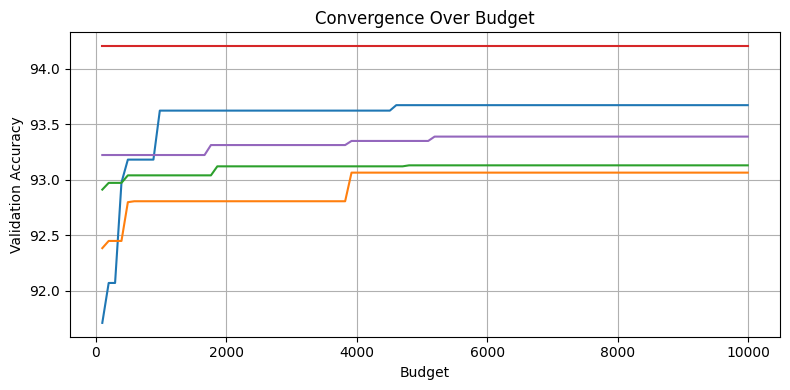

In [51]:
plt.figure(figsize=(8, 4))
for seed in [0, 42, 1234, 2025, 4321]:
    budget = gs1_df[gs1_df['seed']==seed]['end_time']
    acc_values = gs1_df[gs1_df['seed']==seed]['metric:val_accuracy [0.0; 100.0] (maximize)']
    best_so_far = np.maximum.accumulate(acc_values)
    plt.plot(budget, best_so_far)

plt.xlabel('Budget')
plt.ylabel('Validation Accuracy')
plt.title('Convergence Over Budget')
# plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

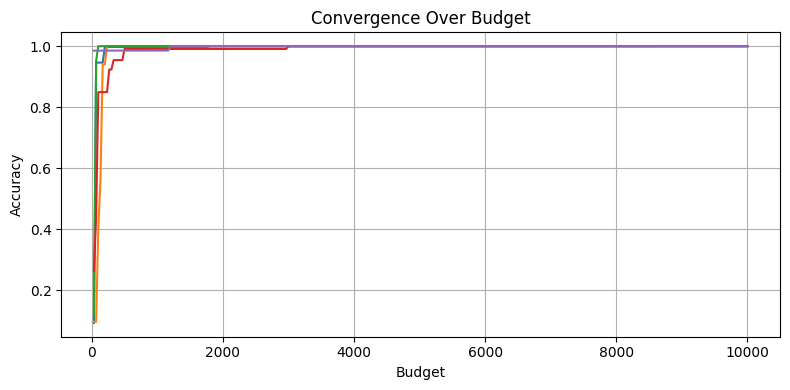

In [52]:
plt.figure(figsize=(8, 4))
for seed in [0, 42, 1234, 2025, 4321]:
    budget = gs2_df[gs2_df['seed']==seed]['end_time']
    acc_values = gs2_df[gs2_df['seed']==seed]['metric:acc [0.0; 1.0] (maximize)']
    best_so_far = np.maximum.accumulate(acc_values)
    plt.plot(budget, best_so_far)

plt.xlabel('Budget')
plt.ylabel('Accuracy')
plt.title('Convergence Over Budget')
# plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

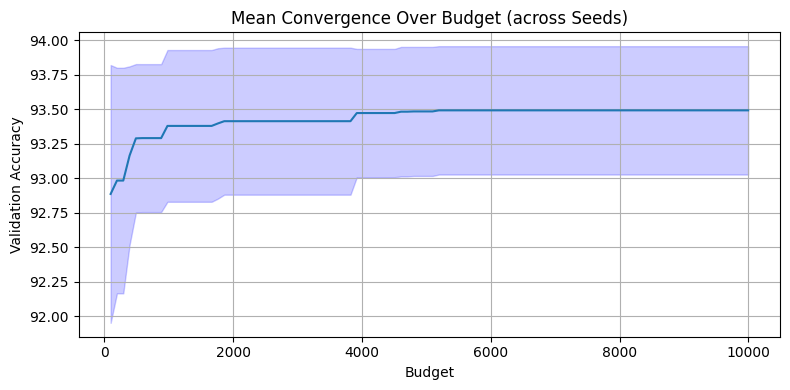

In [54]:
plt.figure(figsize=(8, 4))
gs1_df['best_so_far'] = gs1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].cummax()
gs1_mean_std_curve = gs1_df.groupby('end_time')['best_so_far'].agg(['mean', 'std']).reset_index()

plt.plot(gs1_mean_std_curve['end_time'], gs1_mean_std_curve['mean'], label='Mean Accuracy')
plt.fill_between(gs1_mean_std_curve['end_time'],
                 gs1_mean_std_curve['mean'] - gs1_mean_std_curve['std'],
                 gs1_mean_std_curve['mean'] + gs1_mean_std_curve['std'],
                 color='blue', alpha=0.2, label='±1 Std Dev')
plt.xlabel('Budget')
plt.ylabel('Validation Accuracy')
plt.title('Mean Convergence Over Budget (across Seeds)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

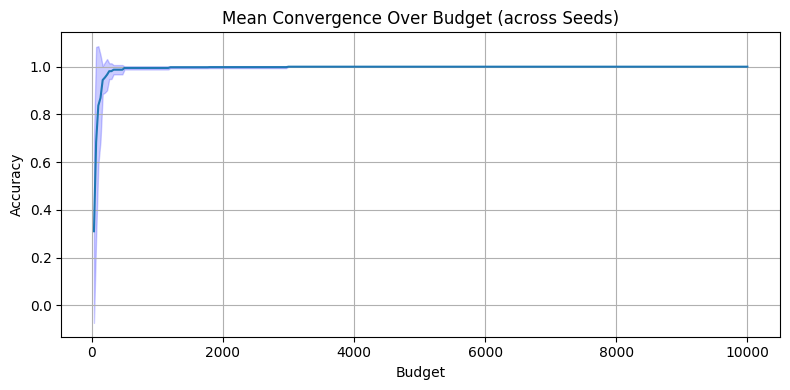

In [56]:
plt.figure(figsize=(8, 4))
gs2_df['best_so_far'] = gs2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].cummax()
gs2_mean_std_curve = gs2_df.groupby('end_time')['best_so_far'].agg(['mean', 'std']).reset_index()

plt.plot(gs2_mean_std_curve['end_time'], gs2_mean_std_curve['mean'], label='Mean Accuracy')
plt.fill_between(gs2_mean_std_curve['end_time'],
                 gs2_mean_std_curve['mean'] - gs2_mean_std_curve['std'],
                 gs2_mean_std_curve['mean'] + gs2_mean_std_curve['std'],
                 color='blue', alpha=0.2, label='±1 Std Dev')
plt.xlabel('Budget')
plt.ylabel('Accuracy')
plt.title('Mean Convergence Over Budget (across Seeds)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

# Convergence Plot

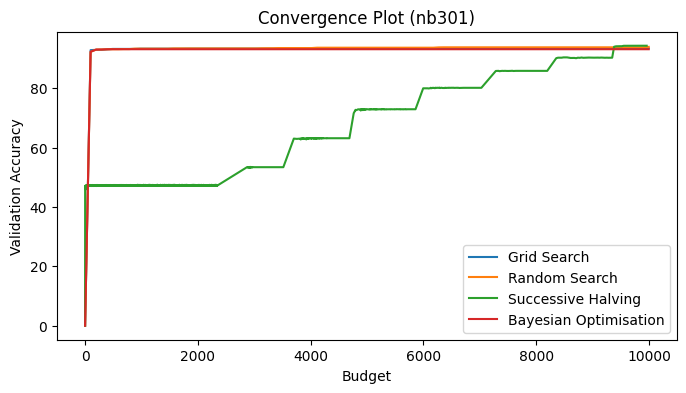

In [57]:
plt.figure(figsize=(8, 4))
plt.plot(pd.concat([pd.Series(0), gs1_mean_std_curve['end_time']]), pd.concat([pd.Series(0), gs1_mean_std_curve['mean']]), label='Grid Search')
plt.plot(pd.concat([pd.Series(0), rs1_mean_std_curve['end_time']]), pd.concat([pd.Series(0), rs1_mean_std_curve['mean']]), label='Random Search')
plt.plot(pd.concat([pd.Series(0), sh1_mean_std_curve['end_time']]), pd.concat([pd.Series(0), sh1_mean_std_curve['mean']]), label='Successive Halving')
plt.plot(pd.concat([pd.Series(0), bo1_mean_std_curve['end_time']]), pd.concat([pd.Series(0), bo1_mean_std_curve['mean']]), label='Bayesian Optimisation')
# plt.plot(rs1_mean_std_curve['end_time'], rs1_mean_std_curve['mean'], label='Random Search')
# plt.plot(bo1_mean_std_curve['end_time'], bo1_mean_std_curve['mean'], label='Bayesian Optimisation')
# plt.plot(gs1_mean_std_curve['end_time'], gs1_mean_std_curve['mean'], label='Grid Search')
# plt.plot(sh1_mean_std_curve['end_time'], sh1_mean_std_curve['mean'], label='Successive Halving')
plt.xlabel('Budget')
plt.ylabel('Validation Accuracy')
plt.title('Convergence Plot (nb301)')
plt.legend()
plt.show()

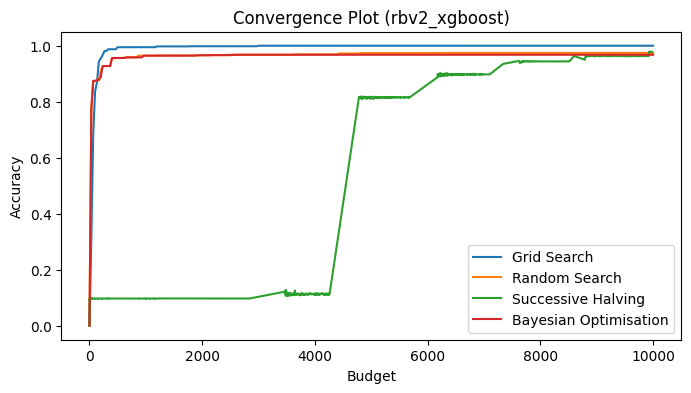

In [64]:
plt.figure(figsize=(8, 4))
plt.plot(pd.concat([pd.Series(0), gs2_mean_std_curve['end_time']]), pd.concat([pd.Series(0), gs2_mean_std_curve['mean']]), label='Grid Search')
plt.plot(pd.concat([pd.Series(0), rs2_mean_std_curve['end_time']]), pd.concat([pd.Series(0), rs2_mean_std_curve['mean']]), label='Random Search')
plt.plot(pd.concat([pd.Series(0), sh2_mean_std_curve['end_time']]), pd.concat([pd.Series(0), sh2_mean_std_curve['mean']]), label='Successive Halving')
plt.plot(pd.concat([pd.Series(0), bo2_mean_std_curve['end_time']]), pd.concat([pd.Series(0), bo2_mean_std_curve['mean']]), label='Bayesian Optimisation')
# plt.plot(rs2_mean_std_curve['end_time'], rs2_mean_std_curve['mean'], label='Random Search')
# plt.plot(bo2_mean_std_curve['end_time'], bo2_mean_std_curve['mean'], label='Bayesian Optimisation')
# plt.plot(gs2_mean_std_curve['end_time'], gs2_mean_std_curve['mean'], label='Grid Search')
# plt.plot(sh2_mean_std_curve['end_time'], sh2_mean_std_curve['mean'], label='Successive Halving')
plt.xlabel('Budget')
plt.ylabel('Accuracy')
plt.title('Convergence Plot (rbv2_xgboost)')
plt.legend()
plt.show()

# Box Plot

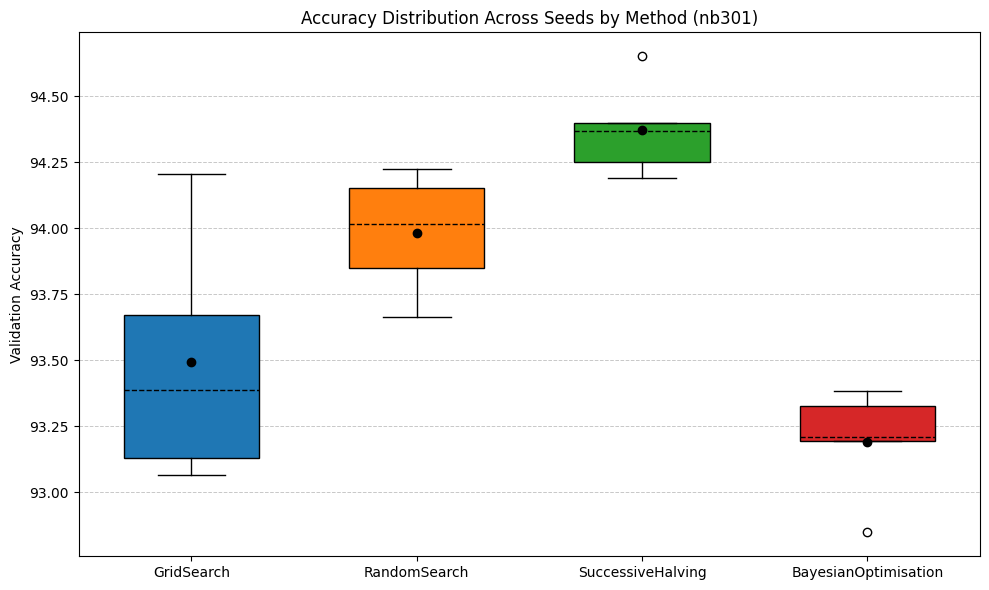

In [62]:
# plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
box = plt.boxplot(
    x=[
        (gs1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max()),
        (rs1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max()),
        (sh1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max()),
        (bo1_df.groupby('seed')['metric:val_accuracy [0.0; 100.0] (maximize)'].max()),
    ],
    patch_artist=True,
    tick_labels=['GridSearch', 'RandomSearch', 'SuccessiveHalving', 'BayesianOptimisation'],
    widths=0.6,
    showmeans=True,
    meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
    medianprops=dict(linestyle='--', color='black'),
)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:4]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Accuracy Distribution Across Seeds by Method (nb301)")
# plt.xlabel("Method")
plt.ylabel("Validation Accuracy")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

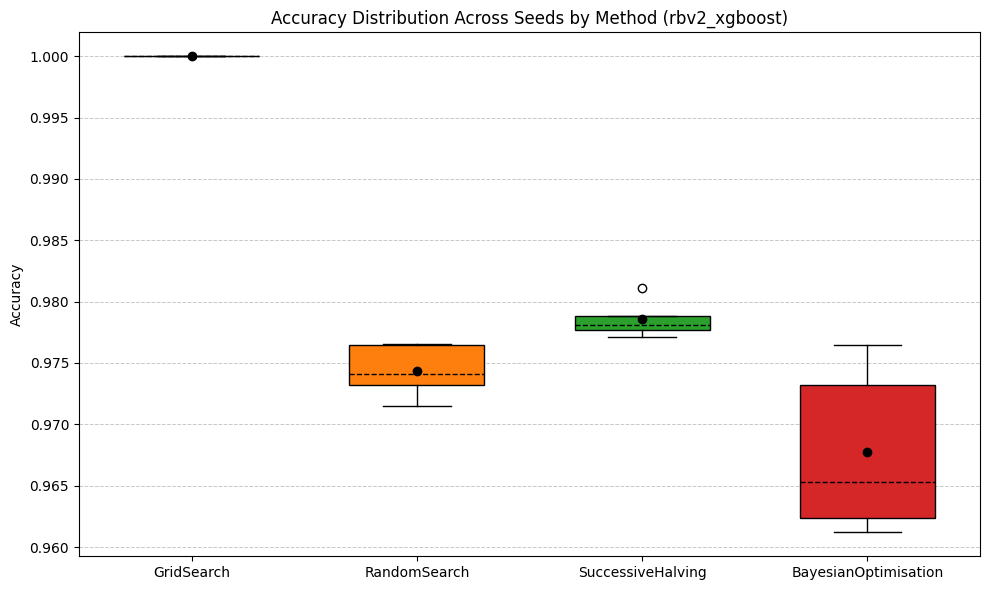

In [63]:
# plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
box = plt.boxplot(
    x=[
        (gs2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max()),
        (rs2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max()),
        (sh2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max()),
        (bo2_df.groupby('seed')['metric:acc [0.0; 1.0] (maximize)'].max()),
    ],
    patch_artist=True,
    tick_labels=['GridSearch', 'RandomSearch', 'SuccessiveHalving', 'BayesianOptimisation'],
    widths=0.6,
    showmeans=True,
    meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
    medianprops=dict(linestyle='--', color='black'),
)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:4]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Accuracy Distribution Across Seeds by Method (rbv2_xgboost)")
# plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

# Runtimes

In [577]:
runtime_file = "./results/pkl/runtimes_10000.pkl"
run_df = pd.DataFrame(
    pd.read_pickle(runtime_file),
    columns=['method', 'scenario', 'seed', 'runtime', 'best_config', 'result', 'total_configs'])

In [578]:
run_df['configs/time'] = run_df['total_configs'] / run_df['runtime']
run_df['time/configs'] = run_df['runtime'] / run_df['total_configs']
run_df

,method,scenario,seed,runtime,best_config,result,total_configs,configs/time,time/configs
0,RandomSearch,nb301,0,0.432096,{'NetworkSelectorDatasetInfo_COLON_darts_COLON...,94.222313,102,236.058781,0.004236
1,BayesianOptimisation,nb301,0,6.483160,{'NetworkSelectorDatasetInfo_COLON_darts_COLON...,93.381989,102,15.733068,0.063560
2,GridSearch,nb301,0,0.374689,{'NetworkSelectorDatasetInfo_COLON_darts_COLON...,93.672066,102,272.226038,0.003673
3,SuccessiveHalving,nb301,0,10.657547,{'NetworkSelectorDatasetInfo_COLON_darts_COLON...,94.249229,2344,219.938035,0.004547
4,RandomSearch,rbv2_xgboost,0,0.248474,"{'subsample': 0.9008787372730335, 'booster': '...",0.976457,300,1207.371514,0.000828
5,BayesianOptimisation,rbv2_xgboost,0,7.021473,"{'subsample': 0.9008787372730335, 'booster': '...",0.976457,300,42.726075,0.023405
6,GridSearch,rbv2_xgboost,0,0.199404,"{'alpha': 0.0009118819655545162, 'booster': 'd...",0.999994,300,1504.483351,0.000665
7,SuccessiveHalving,rbv2_xgboost,0,3.060859,"{'subsample': 0.22090431829154594, 'booster': ...",0.978246,2840,927.844122,0.001078
8,RandomSearch,nb301,42,0.344365,{'NetworkSelectorDatasetInfo_COLON_darts_COLON...,93.664352,102,296.197041,0.003376
9,BayesianOptimisation,nb301,42,6.802599,{'NetworkSelectorDatasetInfo_COLON_darts_COLON...,93.324715,102,14.994269,0.066692


<Axes: title={'center': 'configs/time'}, xlabel='method'>

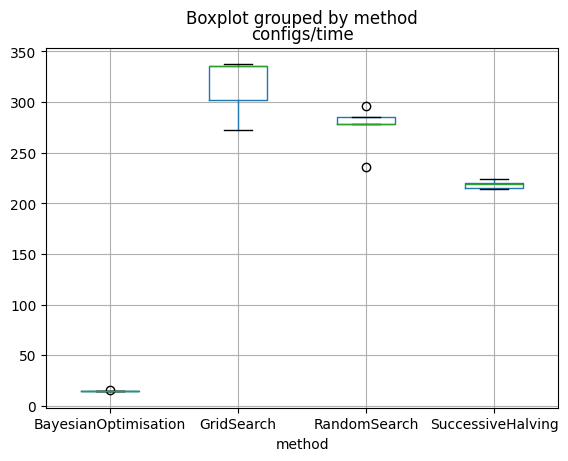

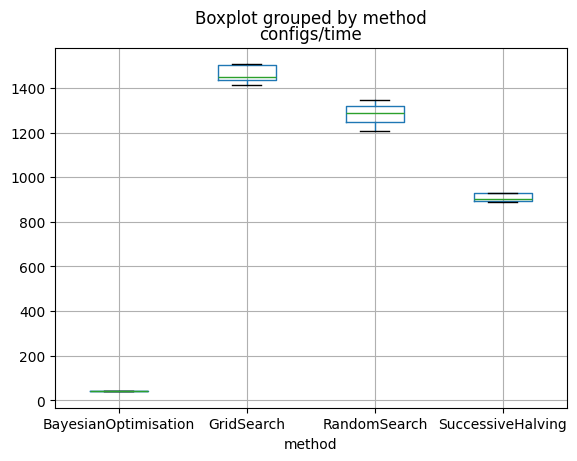

In [579]:
run_df[run_df['scenario'] == 'nb301'].boxplot(column='configs/time', by='method')
run_df[run_df['scenario'] == 'rbv2_xgboost'].boxplot(column='configs/time', by='method')

<Axes: title={'center': 'time/configs'}, xlabel='method'>

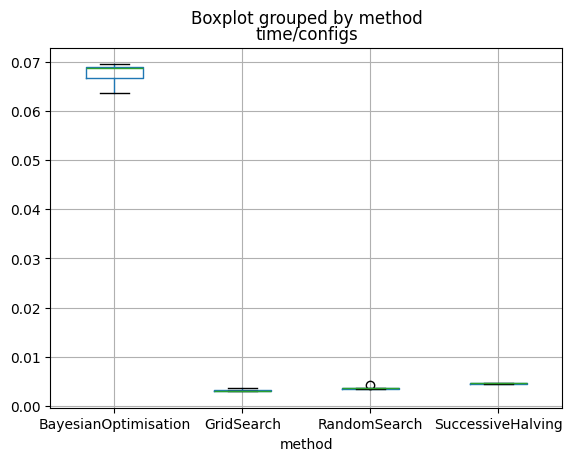

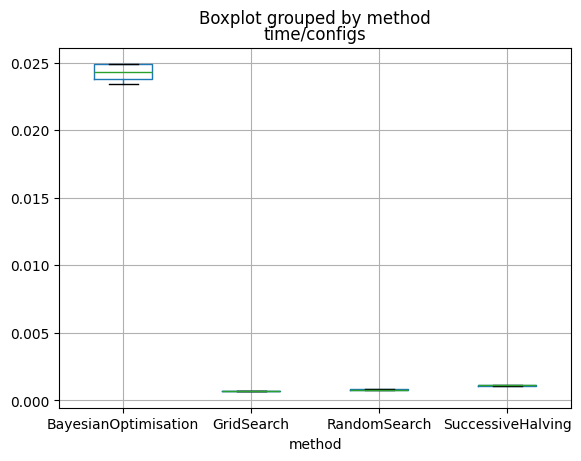

In [580]:
run_df[run_df['scenario'] == 'nb301'].boxplot(column='time/configs', by='method')
run_df[run_df['scenario'] == 'rbv2_xgboost'].boxplot(column='time/configs', by='method')

# DeepCave

In [538]:
def get_configs_df(scenario):
    json_path = f"./data/{scenario}/cs.json"
    df = pd.read_json(json_path)
    df = df[df['name'] != 'task_id'].reset_index()

    df['distribution'] = np.where(df['type'] == 'uniform_int', 'uniform', np.where(df['type'] == 'uniform_float', 'uniform', np.NaN))
    df['ordered'] = np.where(df['type'] == 'categorical', False, np.NaN)
    df['type'] = np.where(df['type'] == 'uniform_int', 'integer', np.where(df['type'] == 'uniform_float', 'float', df['type']))

    df['choices'] = df['choices'].apply(lambda x: x if isinstance(x, list) else [])

    max_len = df['choices'].apply(lambda x: len(x)).max()
    choices_expanded = pd.DataFrame(
        df['choices'].apply(lambda x: x + [None] * (max_len - len(x))).tolist(),
        columns=[f'item_{i}' for i in range(max_len)],
    )
    df = pd.concat([df.drop(columns=['choices', 'probabilities']), choices_expanded], axis=1)
        
    return df

In [539]:
for scenario in ['nb301', 'rbv2_xgboost']:
    df = get_configs_df(scenario)
    df.to_csv(f"results/csv/configspace-{scenario}.csv")

In [595]:
def get_trials_df(method, scenario_instance, seed):
    results_file = f"./results/pkl/{seed}/{method}_{scenario_instance}_10000.pkl"
    lst = pd.read_pickle(results_file)

    if method == 'SuccessiveHalving':
        ex = ['epoch', 'start_time', 'end_time', 'val_accuracy', 'acc']
        configs_dict = {}
        i = 1
        configs = []
        for config in lst:
            config_hps = {k: v for k, v in config.items() if k not in ex}
            key = frozenset(config_hps.items())
            if key not in configs_dict:
                configs_dict[key] = i
                i += 1

            config['config_id'] = configs_dict[key]
            configs.append(config)
        df = pd.DataFrame(configs)
    else:
        df = pd.DataFrame(lst)
    
    try:
        df = df.drop(columns='task_id')
    except:
        pass
    
    df['seed'] = seed
    df['status'] = 'success'
    if scenario_instance == 'nb301_cifar10':
        df = df.rename(columns={'val_accuracy': 'metric:val_accuracy [0.0; 100.0] (maximize)'})
    else:
        df = df.rename(columns={'acc': 'metric:acc [0.0; 1.0] (maximize)'})
    
    if method != 'SuccessiveHalving': df['config_id'] = df.index

    scenario = '_'.join(scenario_instance.split('_')[:-1])
    cs = pd.read_csv(f"./results/csv/configspace-{scenario}.csv")
    default_dict = cs.set_index('name')['default'].to_dict()
    trials = df.copy()
    for name, default in default_dict.items():
        if name not in trials.columns:
            trials[name] = default
        else:
            trials[name] = trials[name].fillna(default)
    trials = trials.sort_values(by=['seed', 'start_time', 'end_time'])
    return trials

In [596]:
for method in ['RandomSearch', 'BayesianOptimisation', 'GridSearch', 'SuccessiveHalving']:
    for scenario_instance in ['nb301_cifar10', 'rbv2_xgboost_16']:
        df = None
        for seed in [0, 42, 1234, 2025, 4321]:
            df = pd.concat([df, get_trials_df(method, scenario_instance, seed)])
        df.to_csv(f"./results/csv/trials-{method}-{scenario_instance}.csv")